# 1. Restaurant sales trend prediction based on factors like temperature and day of the week

In [1]:
#importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, confusion_matrix,ConfusionMatrixDisplay


In [2]:
#importing dataset

In [3]:
df = pd.read_csv("updated_restaurant_sales.csv")

In [4]:
df.head()

,Day_of_the_week,Temperature,Humidity,Weather_description,Sales_trend
0,1,32,35,clear,high
1,3,28,40,haze,moderate
2,5,38,50,thunderstorm,low
3,6,30,30,clouds,high
4,0,35,55,thunderstorm,low


In [5]:
df.tail()

,Day_of_the_week,Temperature,Humidity,Weather_description,Sales_trend
1699,0,28,20,freezing rain,high
1700,1,30,45,heavy intensity drizzle,high
1701,2,25,50,thunderstorm,high
1702,3,20,55,thunderstorm with drizzle,high
1703,5,28,40,haze,low


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Day_of_the_week      1704 non-null   int64 
 1   Temperature          1704 non-null   int64 
 2   Humidity             1704 non-null   int64 
 3   Weather_description  1704 non-null   object
 4   Sales_trend          1704 non-null   object
dtypes: int64(3), object(2)
memory usage: 66.7+ KB


In [7]:
df.describe()

,Day_of_the_week,Temperature,Humidity
count,1704.000000,1704.000000,1704.000000
mean,3.042840,33.870305,49.002347
std,2.009355,4.701566,16.240052
min,0.000000,20.000000,0.000000
25%,1.000000,30.000000,40.000000
50%,3.000000,34.000000,45.000000
75%,5.000000,38.000000,60.000000
max,6.000000,43.000000,100.000000


In [8]:
df['Day_of_the_week'].value_counts()

5    274
6    243
0    241
1    239
2    237
3    236
4    234
Name: Day_of_the_week, dtype: int64

In [9]:
df['Weather_description'].unique()

array(['clear', 'haze', 'thunderstorm', 'clouds', 'clear sky',
       'few clouds', 'scattered clouds', 'broken clouds',
       'overcast clouds', 'mist', 'smoke', 'dust', 'fog', 'sand',
       'thunderstorm with light rain', 'thunderstorm with rain',
       'thunderstorm with heavy rain', 'light thunderstorm',
       'heavy thunderstorm', 'ragged thunderstorm',
       'thunderstorm with light drizzle', 'thunderstorm with drizzle',
       'thunderstorm with heavy drizzle', 'light intensity drizzle',
       'drizzle', 'heavy intensity drizzle',
       'light intensity drizzle rain', 'drizzle rain',
       'heavy intensity drizzle rain', 'shower rain and drizzle',
       'heavy shower rain and drizzle', 'shower drizzle', 'light rain',
       'moderate rain', 'heavy intensity rain', 'very heavy rain',
       'extreme rain', 'freezing rain', 'light intensity shower rain',
       'shower rain', 'heavy intensity shower rain', 'ragged shower rain'],
      dtype=object)

In [10]:
df['Weather_description'].nunique()

42

In [11]:
df['Weather_description'].value_counts()

haze                               323
few clouds                         152
light rain                         149
clear sky                          148
scattered clouds                   146
drizzle rain                        65
moderate rain                       64
light intensity drizzle             59
thunderstorm                        49
extreme rain                        45
thunderstorm with heavy rain        42
clouds                              37
heavy thunderstorm                  35
heavy intensity rain                34
overcast clouds                     23
heavy intensity drizzle             23
very heavy rain                     20
thunderstorm with light rain        19
thunderstorm with light drizzle     19
thunderstorm with rain              19
thunderstorm with heavy drizzle     18
dust                                13
heavy intensity drizzle rain        11
drizzle                             11
thunderstorm with drizzle           11
heavy shower rain and dri

In [12]:
df['Sales_trend'].value_counts()

low         862
moderate    470
high        372
Name: Sales_trend, dtype: int64

In [13]:
# EDA

<Axes: >

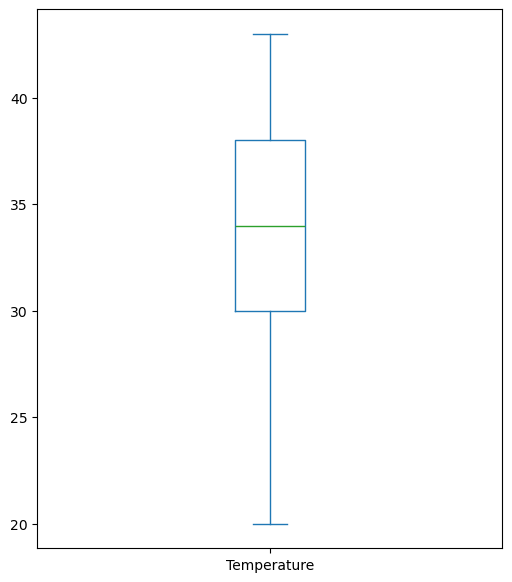

In [14]:
df.plot.box(column='Temperature',figsize=(6,7))

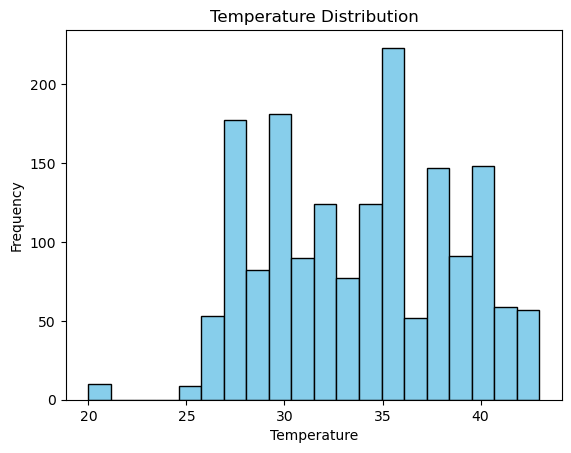

In [15]:
plt.hist(df['Temperature'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Temperature Distribution')
plt.show()

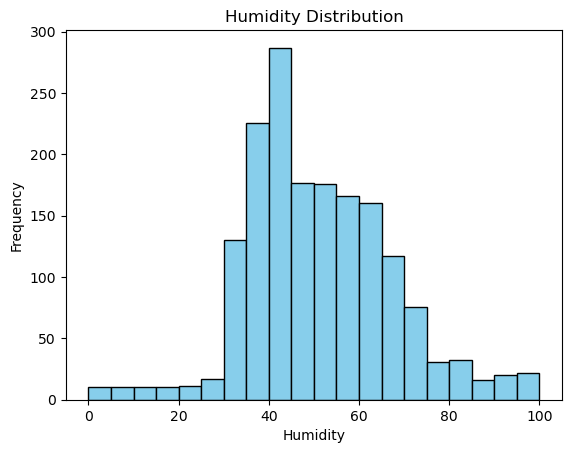

In [16]:
plt.hist(df['Humidity'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Humidity')
plt.ylabel('Frequency')
plt.title('Humidity Distribution')
plt.show()

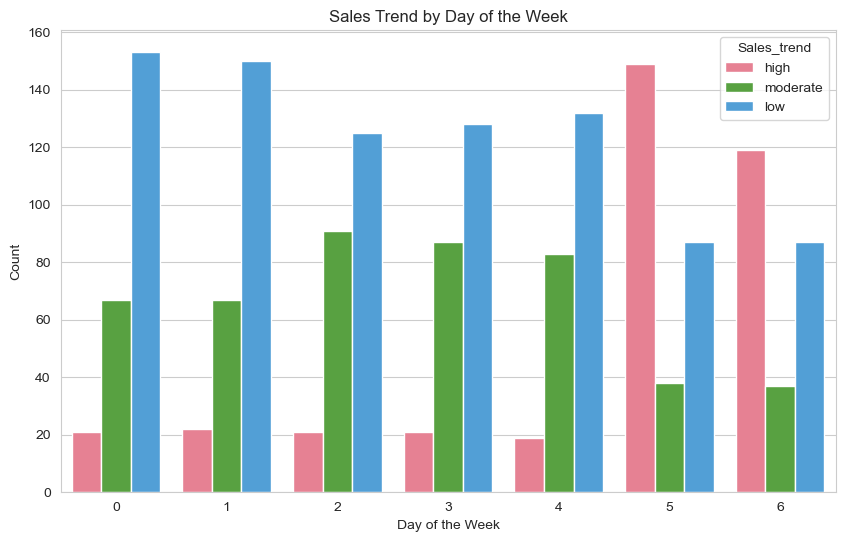

In [17]:
# Create a bar plot for Sales_Trend by Day_of_the_week
# Set the style of seaborn
sns.set_style("whitegrid")

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.countplot(x='Day_of_the_week', hue='Sales_trend', data=df, palette='husl')

# Add labels and title
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.title('Sales Trend by Day of the Week')

# Show the plot
plt.show()

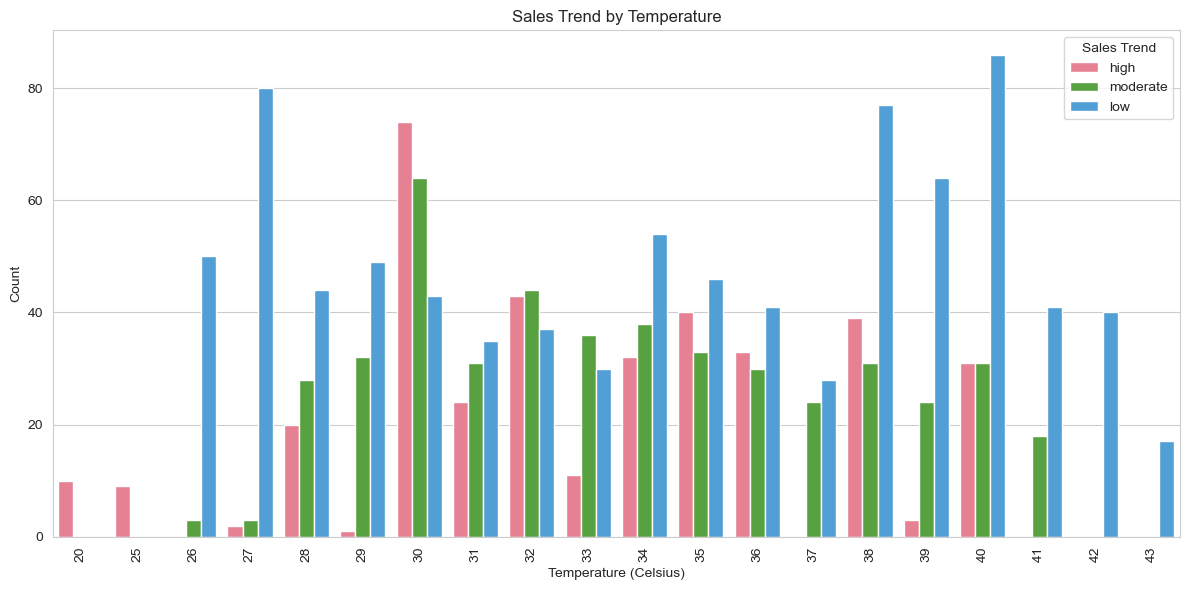

In [18]:
# Create a bar plot for Sales_Trend by Temperature_C
plt.figure(figsize=(12, 6))
sns.countplot(x='Temperature', hue='Sales_trend', data=df,palette='husl')
plt.title('Sales Trend by Temperature')
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Sales Trend')
plt.tight_layout()
plt.show()

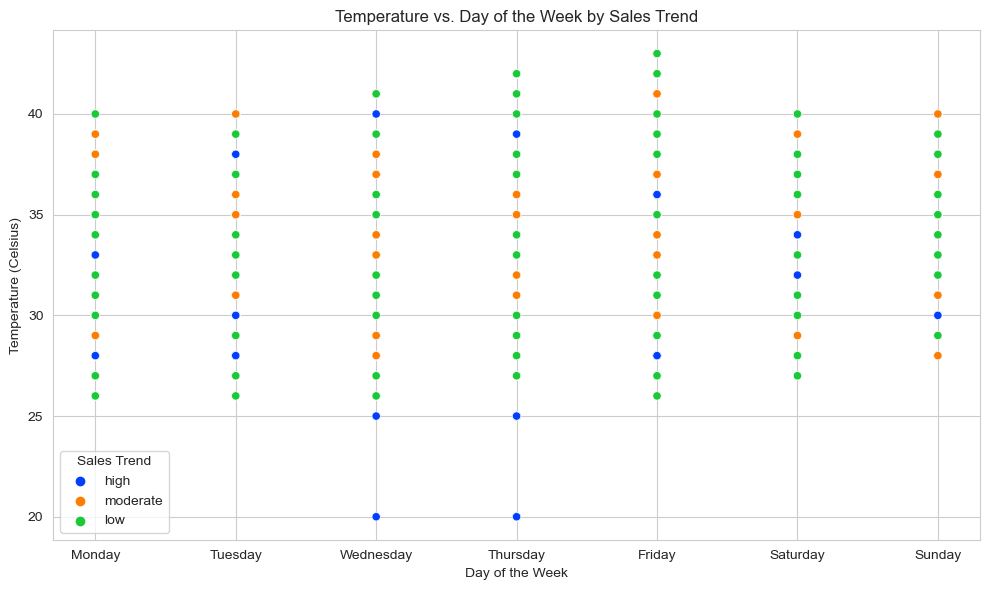

In [19]:
# Create a scatter plot for Temperature_C vs. Day_of_the_week colored by Sales_Trend
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Day_of_the_week', y='Temperature', hue='Sales_trend', data=df, palette='bright')
plt.title('Temperature vs. Day of the Week by Sales Trend')
plt.xlabel('Day of the Week')
plt.ylabel('Temperature (Celsius)')
plt.xticks(ticks=range(7), labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.legend(title='Sales Trend')
plt.grid(True)
plt.tight_layout()
plt.show()

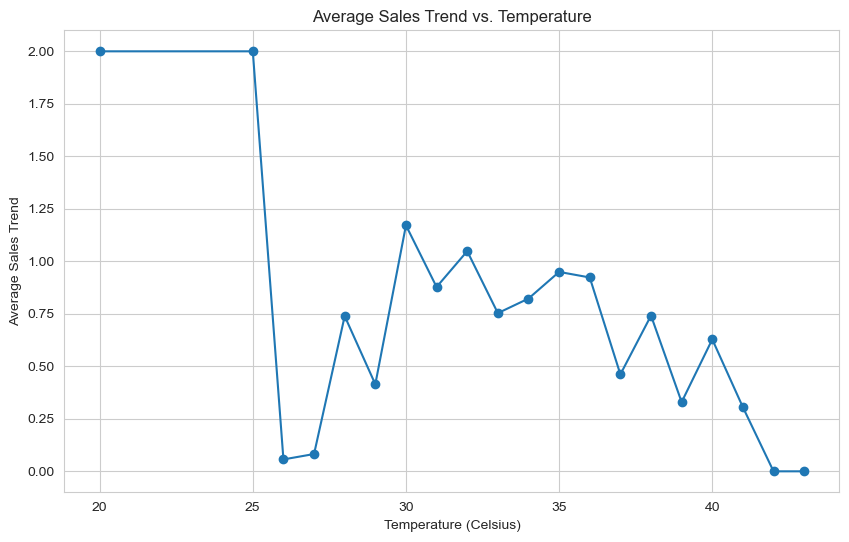

In [20]:
# Map sales trend categories to numerical values
sales_trend_mapping = {'low': 0, 'moderate': 1, 'high': 2}
df['Sales_Trend_Num'] = df['Sales_trend'].map(sales_trend_mapping)

# Group the data by Temperature_C and calculate the mean sales trend for each temperature
mean_sales_by_temperature = df.groupby('Temperature')['Sales_Trend_Num'].mean().reset_index()

# Create a line plot for Sales_Trend_Num vs. Temperature_C
plt.figure(figsize=(10, 6))
plt.plot(mean_sales_by_temperature['Temperature'], mean_sales_by_temperature['Sales_Trend_Num'], marker='o', linestyle='-')
plt.title('Average Sales Trend vs. Temperature')
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Average Sales Trend')
plt.grid(True)
plt.show()

In [21]:
pivot_table = df.pivot_table(index='Weather_description', columns='Sales_trend', aggfunc='size', fill_value=0)

pivot_table.columns = ['Low', 'Moderate', 'High']
# Display the pivot table
print(pivot_table)

                                 Low  Moderate  High
Weather_description                                 
broken clouds                      4         1     5
clear                              4         5     0
clear sky                         35        54    59
clouds                             2        30     5
drizzle                            1         9     1
drizzle rain                      31        33     1
dust                               1        11     1
extreme rain                       1        43     1
few clouds                        35        58    59
fog                                1         9     1
freezing rain                      2         7     1
haze                              31       153   139
heavy intensity drizzle            2        20     1
heavy intensity drizzle rain       2         8     1
heavy intensity rain               2        26     6
heavy intensity shower rain        2         7     1
heavy shower rain and drizzle      2         8

In [22]:
#encoding the weather description
from sklearn.preprocessing import LabelEncoder
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the categorical feature 'Weather_description' into numerical values
df['Weather_description_encoded'] = label_encoder.fit_transform(df['Weather_description'])

# Drop the original 'Weather_description' column
df.drop('Weather_description', axis=1, inplace=True)

In [23]:
# Get the original class labels corresponding to the encoded values
weather_description_classes = label_encoder.classes_

# Print the original class labels along with their encoded values
for encoded_value, original_label in enumerate(weather_description_classes):
    print(f"Encoded value {encoded_value} corresponds to weather description '{original_label}'")


Encoded value 0 corresponds to weather description 'broken clouds'
Encoded value 1 corresponds to weather description 'clear'
Encoded value 2 corresponds to weather description 'clear sky'
Encoded value 3 corresponds to weather description 'clouds'
Encoded value 4 corresponds to weather description 'drizzle'
Encoded value 5 corresponds to weather description 'drizzle rain'
Encoded value 6 corresponds to weather description 'dust'
Encoded value 7 corresponds to weather description 'extreme rain'
Encoded value 8 corresponds to weather description 'few clouds'
Encoded value 9 corresponds to weather description 'fog'
Encoded value 10 corresponds to weather description 'freezing rain'
Encoded value 11 corresponds to weather description 'haze'
Encoded value 12 corresponds to weather description 'heavy intensity drizzle'
Encoded value 13 corresponds to weather description 'heavy intensity drizzle rain'
Encoded value 14 corresponds to weather description 'heavy intensity rain'
Encoded value 15

In [24]:
#split dataframe into training and testing set

In [25]:
df.head()

,Day_of_the_week,Temperature,Humidity,Sales_trend,Sales_Trend_Num,Weather_description_encoded
0,1,32,35,high,2,1
1,3,28,40,moderate,1,11
2,5,38,50,low,0,34
3,6,30,30,high,2,3
4,0,35,55,low,0,34


In [26]:
X = df[[ 'Day_of_the_week','Temperature','Humidity','Weather_description_encoded']]
y = df['Sales_trend']  # Target variable

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
X_train.shape

(1363, 4)

In [52]:
 X_test.shape

(341, 4)

In [53]:
y_train.shape

(1363,)

In [54]:
y_test.shape

(341,)

# 1. Logistic Regression

In [32]:
logistic_model = LogisticRegression(multi_class='multinomial', max_iter=500)


In [33]:
logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=500, multi_class='multinomial')

In [34]:
y_pred = logistic_model.predict(X_test)

In [35]:
accuracy_score(y_test, y_pred)

0.513671875

# 2. Decision Tree

In [55]:
decision_tree_model = DecisionTreeClassifier(random_state=42)

In [56]:
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [57]:
y_pred_tree = decision_tree_model.predict(X_test)

In [58]:
accuracy_score(y_test, y_pred_tree)

0.8680351906158358

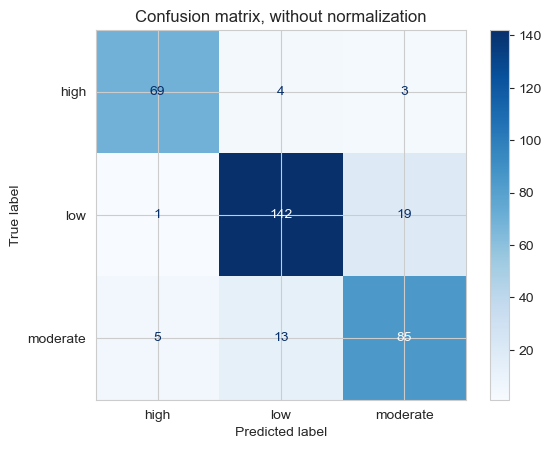

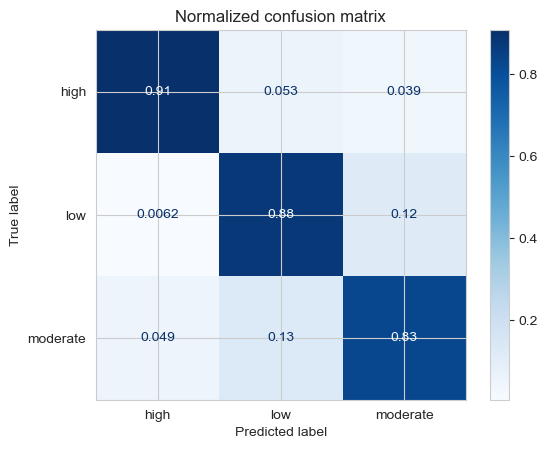

In [59]:

titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        decision_tree_model,
        X_test,
        y_test,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

In [60]:
precision_score(y_test, y_pred_tree, average='weighted',zero_division='warn')

0.8692717747494455

In [61]:
recall_score(y_test, y_pred_tree, average='weighted')

0.8680351906158358

In [62]:
f1_score(y_test, y_pred_tree, average='weighted')

0.8685190874694274

In [63]:
# day_encoded = 0  # Monday
# temp = 33
# humidity = 50
# weather_encoded = 35  # Thunderstorm

# # Predict the result for the new row
# decision_tree_model.predict([[day_encoded, temp, humidity, weather_encoded]])
decision_tree_model.feature_importances_

array([0.21179549, 0.23748206, 0.27029104, 0.28043141])

In [64]:
#dumping the model

In [65]:
import pickle

In [66]:
# Save the model to a file
with open('./../savedModels/updated_decision_tree_model.pkl', 'wb') as file:
    pickle.dump(decision_tree_model, file)